### Read Korean Ballad Lyrics Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
# designate root path for the data
DATA_ROOT_PATH = "./data"

# designate path for each dataset files
LYRIC_PATH = os.path.join(DATA_ROOT_PATH, "lyrics_kor.txt")
BILLBOARD_PATH = os.path.join(DATA_ROOT_PATH, "rawdata_김지훈_201500844.tsv")
GEULSTAGRAM_PATH = os.path.join(DATA_ROOT_PATH, "geulstagram.csv")

In [3]:
# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

sample_lyrics = read_txt(LYRIC_PATH)[:10]
sample_lyrics

['내 곁에서 떠나가지 말아요 \n',
 '그대없는 밤은 너무 쓸쓸해 \n',
 '그대가 더 잘 알고 있잖아요 \n',
 '제발 아무말도 하지 말아요\n',
 '나약한 내가 뭘 할수 있을까 생각을 해봐\n',
 '그대가 내겐 전부였었는데 음~오 \n',
 '제발 내 곁에서 떠나가지 말아요\n',
 '그대없는 밤은 너무 싫어\n',
 '우~우~우~ 돌이킬수 없는 그대 마음 \n',
 '우~우~우~ 이제와서 다시 어쩌려나\n']

In [4]:
import numpy as np

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [5]:
import re

stopwords = [
    "사연을 읽어주는 여자",
    "메시지 지금 동건 글",
    "전송됨",
    "가희 글",
    "공유",
    "댓글",
    "오후",
    "오전"
    "등등",
    "중략",
    "신중근",
    "신중군"
    "글 사진"
]

# make preprocessing function
def preprocess(list_lines:list) -> list:
    # remove \n
    removed_lines = [line.strip() for line in list_lines]

    # filter stopwords from the line item in list_lines using regex
    removed_lines = []
    for line in list_lines:
        for stopword in stopwords:
            line = re.sub(stopword, '', line)
        removed_lines.append(line)

    # remove empty lines
    removed_lines = [line for line in removed_lines if line]
    
    # remove duplicate elements from the removed_lines
    removed_lines = list(set(removed_lines))

    # strip whitespace
    removed_lines = [sentence.strip() for sentence in removed_lines]

    # remove tabs
    removed_lines = [sentence.replace('\t', '') for sentence in removed_lines]

    # remove double spaces or longer spaces into single space
    for i in range(2,5):
        removed_lines = [sentence.replace(' '*i, ' ') for sentence in removed_lines]

    # remove one letter items
    removed_lines = [sentence for sentence in removed_lines if len(sentence) > 1]

    return removed_lines

preprocess(sample_lyrics)

['우~우~우~ 이제와서 다시 어쩌려나',
 '그대가 내겐 전부였었는데 음~오',
 '제발 내 곁에서 떠나가지 말아요',
 '그대가 더 잘 알고 있잖아요',
 '우~우~우~ 돌이킬수 없는 그대 마음',
 '내 곁에서 떠나가지 말아요',
 '그대없는 밤은 너무 쓸쓸해',
 '나약한 내가 뭘 할수 있을까 생각을 해봐',
 '제발 아무말도 하지 말아요',
 '그대없는 밤은 너무 싫어']

### Read Korean Billboard Song dataset

In [6]:
# read and load from tsv
df_billboard = pd.read_csv(BILLBOARD_PATH, sep='\t')
print(df_billboard.shape)
df_billboard.head(3)

(2276, 5)


,ID,Year,Title,Singer,Lyric
0,1,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...
1,2,1964,마도로스 부기,백야성,항구의 일~~번지 부기우기 일~번지 그라스를 채워~다오 부기우기 아~~가씨 고동이 ...
2,3,1964,이국땅,남일해,하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...


In [7]:
# filter by year where year is greater than 2015
df_billboard_recent = df_billboard[df_billboard['Year'] > 2010]
# remove row where Lyric contains "청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다."
df_billboard_recent = df_billboard_recent[df_billboard_recent['Lyric'].str.contains("청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다.") == False]
# display head of the dataframe
df_billboard_recent.head(3)

,ID,Year,Title,Singer,Lyric
1832,1833,2011,여우야,투개월,창 밖엔 서글픈 비만 내려오네 내 마음 너무 안타까워 이제 다시 볼 수가 없기에 처...
1833,1834,2011,Lonely,2NE1,지금 내가 하는 얘기 널 아프게 할지 몰라 아마 날 죽도록 미워하게 될 꺼야 내가 ...
1834,1835,2011,나만 몰랐던 이야기,아이유,정말 넌 다 잊었더라 반갑게 날 보는 너의 얼굴 보니 그제야 어렴풋이 아파오더라 새...


### Read Geulstagram dataset

In [8]:
df_geulstagram = pd.read_csv(GEULSTAGRAM_PATH)
print(df_geulstagram.shape)
df_geulstagram.head(3)

(25179, 8)


,Unnamed: 0,USER_ID,Image_Content_txt,Image_Content_txt_result,Content_txt,Hashtags,Hashtags_result,Spell_Checked_Content
0,0,1day1poem,XXL 칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 ...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뻣뻣한 것을 다 벌...,"['가능하면1일1시', '190706', '임재건', '1일1시', '다시는사랑이없...","['자작시', '시', '시스타그램', '감성', '감성글', '공감', '공감글'...",칫솔은 새것인데 솔질이 새것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어진 ...
1,1,1day1poem,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라...,"['가능하면1일1시', '190701', '임재건', '다시는사랑이없을줄알았습니다'...","['벗', '혐오', '호불호', '자작시', '시', '시스타그램', '감성', ...",아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라....
2,2,1day1poem,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 ...,"['가능하면1일1시', '190807', '임재건', '1일1시', '다시는사랑이없...","['달달', '달', '초승달', '보름달', '밤', '하늘', '자작시', '시...",어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...


In [9]:
# check non null items in the dataframe
df_geulstagram.isnull().sum()

Unnamed: 0                    0
USER_ID                       0
Image_Content_txt             0
Image_Content_txt_result     30
Content_txt                   0
Hashtags                      0
Hashtags_result               0
Spell_Checked_Content       616
dtype: int64

In [10]:
# drop null items
df_geulstagram.dropna(inplace=True)

### Concatanate Ballad, Billboard, Geulstagram into one list

In [13]:
list_poetic_sentences = []

# load lists
list_lyrics = read_txt(LYRIC_PATH)
list_billboard = df_billboard_recent['Lyric'].tolist()
list_geulstagram = df_geulstagram['Spell_Checked_Content'].tolist()

# concatenate lists
list_poetic_sentences = list_lyrics + list_billboard + list_geulstagram
print(len(list_poetic_sentences))

sampling(list_poetic_sentences, 10)

87342


['내가 너를 나태주 내가 너를 얼마나 좋아하는지 너는 몰라도 된다 너를 좋아하는 마음은 오로지 나의 것이요. 나의 그리움은 나 혼자만의 것으로도 차고 넘치니까. 나는 이제 너 없이도 너를 좋아할 수 있다.',
 '빛과 그대 모습 사라져\n',
 '하고 싶은 거 하고 살아 누굴 위해 살지 말고 널 위해 살았으면 좋겠어 네가 없으면 이 세상도 없는 거니까 드라마 급 공무원 중에서 아재 글',
 '남겨진 시간들은\n',
 '돌아서 눈감으면 잊을까\n',
 '무엇 하나 보여줄 것 없으니\n',
 '행복하기만 했어\n',
 '\n',
 '세월이 흘러가면 사랑을 알지\n',
 '흐린 가을 하늘에 편지를 써 \n']

In [1]:
import kss
from tqdm import tqdm

def break_sentence(list_sentences:list) -> list:
    """ 
    break the string items of the into sentences (sentence segmentation)
    """
    
    # strip whitespace
    list_sentences = [sentence.strip() for sentence in list_sentences]

    # remove \n
    list_sentences = [sentence.replace('\n', '') for sentence in list_sentences]

    # drop empty items
    list_sentences = [sentence for sentence in list_sentences if sentence]

    sentence_list = []
    
    # split string item into sublist
    # https://github.com/hyunwoongko/kss/
    for item in tqdm(list_sentences):
        item = kss.split_sentences(
            item, # batch input rather than single string
            backend = "mecab", # default is pynori. mecab 5x is faster than pynori: https://github.com/hyunwoongko/kss/blob/main/docs/ANALYSIS.md#11-open-ended-segmentation
            num_workers = -1, # use maximum workers as possible
            use_heuristic = True
            )
        sentence_list.extend(item)

    # apply preprocessing function for each item in line_sentences
    sentence_list = preprocess(sentence_list)

    # drop empty items
    sentence_list = [sentence for sentence in sentence_list if sentence]

    # drop duplicate items
    sentence_list = list(set(sentence_list))

    return sentence_list

sample_sentences = break_sentence(list_poetic_sentences)
print(len(sample_sentences))
sampling(sample_sentences, 20)

NameError: name 'list_poetic_sentences' is not defined

In [16]:
# 8 hours per 80000 sentences when using pynori
breaken_down_sentences = break_sentence(list_poetic_sentences)
len(breaken_down_sentences)

  5%|▌         | 4316/79483 [20:28<7:55:59,  2.63it/s]

In [14]:
# save the list of sentences to a txt file
with open(os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt"), 'w', encoding='utf-8') as f:
    for sentence in breaken_down_sentences:
        f.write(sentence + '\n')


### EDA (Work in Progress)

In [15]:
# read dataset from poetic_sentences_kor.txt
path = os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt")
list_loaded = read_txt(path)
len(list_loaded)

78822

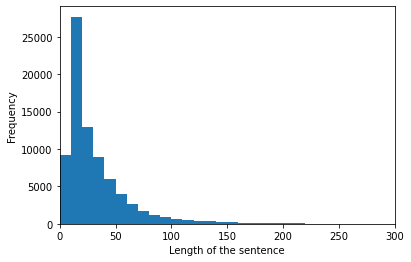

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 10 characters
plt.hist(list(map(len, list_loaded)), bins=np.arange(0, max(list(map(len, list_loaded)))+1, 10))
plt.xlim(0, 300) # set x tick limit to 300
plt.xlabel("Length of the sentence")
plt.ylabel("Frequency")
plt.show()

In [17]:
# get proportion of sentences where length is longer than 50
length = 50
list_long = list(filter(lambda x: len(x) > length, list_loaded))
print(len(list_long) , len(list_long) / len(list_loaded))
sampling(list_long, 10)

13742 0.17434218872903504


['행복은 어쩌다 한번 주어지는 큰 재산 같은 것이 아니라 일상생활에서 일어나는 작은 이익들로 만들어진다\n',
 '만약 지금 내 주변에 고통받는 사람이 있는데도 내가 남들보다 권력과 재 물 명예와 인기를 더 많이 가졌다면 그것으로 누리는 내 기쁨은 그들의 희생으로 얻어진 것입니다\n',
 '화요일 메시지 지금 석굴 사랑해라는 말이 사랑했었다고 변하고 달려갈게라는 말이 보고 싶다고 변하고 예쁜 곳을 가자던 말이 예쁜 곳을 가라는 말로 변했다 사랑을 이 제야 알게 되었는데 사랑을 잃었다\n',
 '여름밤 서점에 갔다 베스트 엘러 코너에 갔다 포츠 선수 연예인 유튜브 에세이가 많다 내 책은 없다 시집은 없다\n',
 '그대의 이름을 불러보고 싶어요 짐짓 아무렇지도 않은 목소리로 그대와 조금 더 오래 있고 싶어요 크고 작은 일들을 바쁘게 섞어하며 그대의 손을 잡아보고 싶어요 여럿 속에 섞여서 아무렇지도 않은 듯 그러다 슬그머니 생각을 거두며 나는 이것이 사랑임을 알아요 꽃이 피기 전 단내로 뻗어오는 찔레순 같은 오월 아침 첫 문을 열고 하늘을 바라보는 마음 같은 이것이 사랑임을 알아요 그러나 나의 사랑이 그대에게 상처가 될까 봐 오늘도 말 안 하고 달빛 아래 돌아와요 어쩌면 두고두고 한 번도 말 안 하고 이렇게 살게 되지 생각하며 혼자서 돌아와요 도종환 혼자 사랑\n',
 '내 손에 잡히는 것들은 결국 언젠가 사라지는 것들이지만 바다를 앞에 두고 걸었던 일이나 그대와 밤길을 걸었던 일\n',
 '숨 막힐 듯 조여 왔던 그대의 하루 누구도 그대의 그 슬픔 몰라주어도 나는 항상 그대를 응원할 거예요 수고했어요 오늘도 응원\n',
 '회사 안은 전쟁터란다 회사 밖은 지옥이란다 나는 전쟁 지옥도 아닌 사람이고 숨 쉬고 싶다 사람 냄새나는 그런 회사생활 없나요\n',
 '잘못된 방법이라는 것을 깨달았을 땐 이미 너의 마음에 상처가 가득했고  서운함이 생길 때마다 어떻게 표현해야 할지 몰라서\n',
 '앞뒤 없이 주위를 둘러보지 못하고 어디가 아픈지도 상처가 났는지도 모를 정

### Remove Names from the sentences (Work in Progress)

In [ ]:
# using NER tagging function of pororo: https://kakaobrain.github.io/pororo/tagging/ner.html
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")
pos_tagged = ner('데일 카네기 인간관계론')
pos_tagged

In [ ]:
from tqdm import tqdm
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")

sample_list = [
    '감성 조각사 한웅',
    '전송됨',
    '요즘은 얼리버드라는 할인 상품도 많고',
    '널 사랑하는 건 힘들지 않아 사랑하지 않는 게 힘든 거지 차돌',
    '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서',
]

# filter "PERSON" tags from the list
def filter_person(list_sentences:list) -> list:
    """ takes too long :( """
    for item in tqdm(list_sentences):
        list_pos_tagged = ner(item)
        for string, pos_tag in list_pos_tagged:
            if pos_tag == "PERSON":
                list_sentences.remove(item)
    return list_sentences

# filter_person(sample_list)

In [ ]:
# check the distribution of the starting character of the list_poetic_sentences
# "가", "나","다" 등 시작하는 글자들에 따른 분포 확인할 필요 있음